Bu veri seti, 2010'dan 2019'a kadar olan dönemde, 20 ülke için bir dizi temel ekonomik, sosyal ve çevresel göstergeyi simüle etmektedir. Veri seti, analiz, politika oluşturma ve tahminleme için kullanılan tipik Dünya Bankası metriklerini yansıtacak şekilde tasarlanmıştır. İçerisinde aşağıdaki değişkenler bulunmaktadır:

Ülke Adı: Verinin kaydedildiği ülke.
Yıl: Gözlemin yapıldığı belirli yıl (2010-2019 arası).
GSYİH (USD): Bir ülkenin ekonomik çıktısını gösteren, milyar ABD doları cinsinden Gayri Safi Yurt İçi Hasıla.
Nüfus: Ülkenin toplam nüfusu, milyon olarak belirtilmiştir.
Beklenen Yaşam Süresi (yıl): Ülke nüfusu için doğumda beklenen ortalama yaşam süresi.
İşsizlik Oranı (%): İş gücünün işsiz ancak aktif olarak iş arayan kesiminin yüzdesi.
CO2 Emisyonları (kişi başına metrik ton): Kişi başına düşen karbondioksit emisyonları, çevresel etkiyi yansıtır.
Elektrik Erişimi (%): Nüfusun elektrik erişimine sahip olan yüzdesi, altyapı gelişimini temsil eder.

In [1]:
#Gerekli kütüphaneleri import edelim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Verimizi okutalım
data=pd.read_csv('world_bank.csv')

In [3]:
#İlk 5 satırı görüntüleyelim
data.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


In [4]:
#Genel bilgi yapısını alalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


Veri setimizdeki sütunlar şunlar:

Country: Ülke adı
Year: Yıl
GDP (USD): Gayri Safi Yurtiçi Hasıla (milyon USD cinsinden)
Population: Nüfus
Life Expectancy: Ortalama yaşam süresi (yıl)
Unemployment Rate (%): İşsizlik oranı (%)
CO2 Emissions (metric tons per capita): Kişi başına düşen CO2 emisyonları (metrik ton)
Access to Electricity (%): Elektrik erişim oranı (%)

In [6]:
#İstatiksel özetimizi alalım
data.describe()

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


In [9]:
#Ülke bazlı CO2 emisyonlarını alalım
co2_avg = data.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().sort_values(ascending=False).head(10)

#En yüksek 7 ülkeyi alalım
co2_avg.head(7)

Country
France           12.485000
South Korea      12.298333
Italy            12.175000
Argentina        12.060000
United States    12.022727
India            11.776000
Australia        11.185714
Name: CO2 Emissions (metric tons per capita), dtype: float64

Ülkeler bazında ortalama CO2 emisyonlarına göre en yüksek değerlere sahip ilk 10 ülke:
Fransa: 12.49 metrik ton/kişi
Güney Kore: 12.30 metrik ton/kişi
İtalya: 12.18 metrik ton/kişi
Arjantin: 12.06 metrik ton/kişi
ABD: 12.02 metrik ton/kişi
India:11.77 metrik/ton kişi
Australia:11.18 metrik/ton kişi


In [15]:
#Yıllık yüzde değişim oranları
karbon_degisim['Emisyon Değişim']=data['CO2 Emissions (metric tons per capita)'].pct_change()*100
karbon_degisim['Emisyon Değişim'].dropna()

1       45.227062
2      -86.726228
3      819.711538
4      -18.139049
5      -51.787995
          ...    
195    202.933333
196     37.235915
197     -5.965362
198    -50.545703
199    130.068966
Name: CO2 Emissions (metric tons per capita), Length: 199, dtype: float64

Yıllık değişim oranları, CO2 emisyonları ve elektrik erişimi oranındaki değişimleri yüzdesel olarak özetlemektedir:

CO2 Emisyonlarındaki Değişim: Emisyonlarda bazı yıllarda ciddi artış veya azalışlar görülebilir. Örneğin, 2011'de %28.56 oranında bir düşüş, 2012'de ise %33.41 oranında bir artış var.

Text(0.5, 1.0, 'Korelasyon Matrisi')

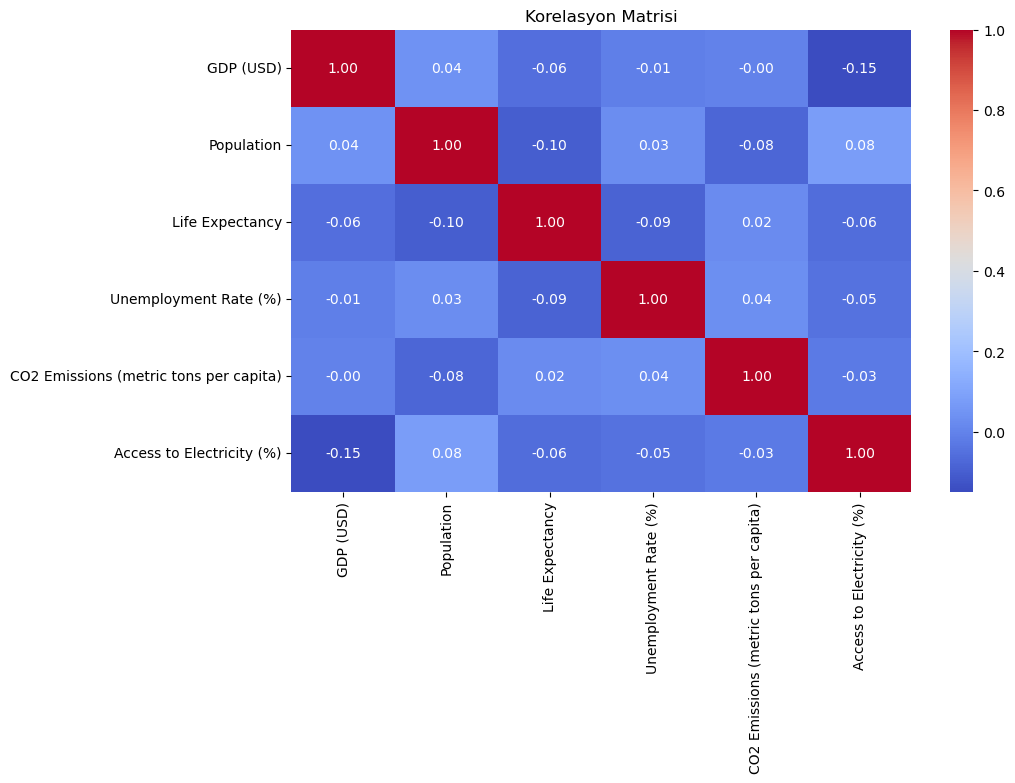

In [16]:
#Korelasyon matrisi kuralım
korelasyon=data[['GDP (USD)', 'Population', 'Life Expectancy', 
                           'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)', 
                           'Access to Electricity (%)']].corr()

#Korelasyon matrisini görselleştirelim
plt.figure(figsize=(10,6))
sns.heatmap(korelasyon,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Korelasyon Matrisi")

Korelasyon matrisinden, değişkenler arasındaki ilişkiler şu şekilde özetlenebilir:

CO2 Emisyonları ile Elektrik Erişimi arasında zayıf pozitif bir ilişki var. Yani, elektrik erişimi arttıkça CO2 emisyonları da az da olsa artıyor.
Nüfus ve Elektrik Erişimi arasında zayıf bir negatif ilişki mevcut, daha büyük nüfuslu ülkelerde elektrik erişimi daha sınırlı olabilir.
Yaşam Süresi ve Elektrik Erişimi arasında orta düzeyde pozitif bir ilişki var; yaşam süresi daha yüksek olan ülkelerde elektrik erişimi de daha yaygın görünüyor.


In [27]:
#Elektrik Erişim Ortalama
yıllık_erisim=data.groupby('Year')['Access to Electricity (%)'].mean().sort_values(ascending=True)
yıllık_erisim

Year
2019    65.4880
2013    70.0265
2015    70.3790
2010    71.1440
2012    71.9995
2017    73.3540
2011    73.4615
2018    75.6100
2016    77.8030
2014    79.5020
Name: Access to Electricity (%), dtype: float64

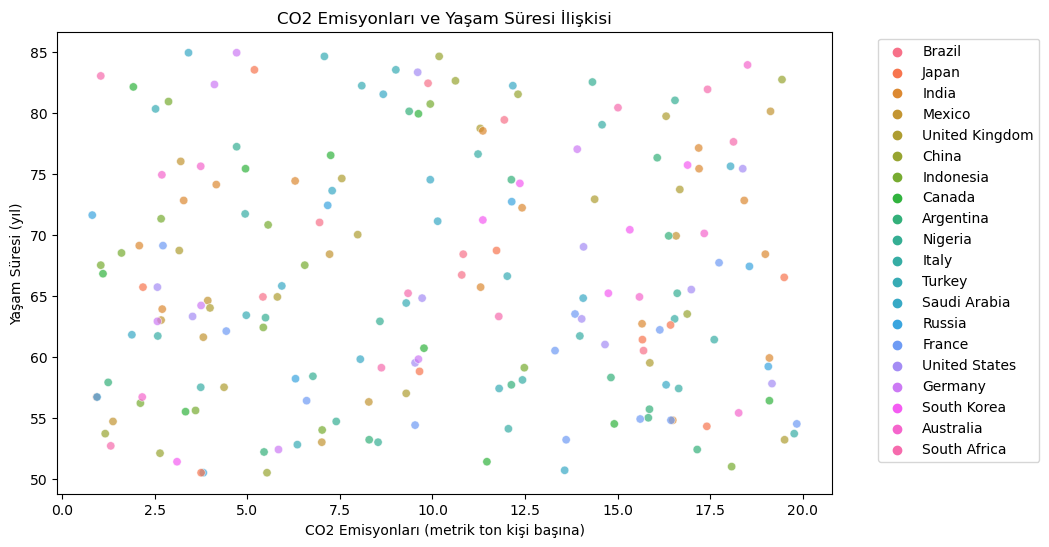

In [28]:
# CO2 Emisyonları ve Yaşam Süresi arasındaki ilişkiyi scatter plot ile görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CO2 Emissions (metric tons per capita)', y='Life Expectancy', hue='Country', alpha=0.7)
plt.title("CO2 Emisyonları ve Yaşam Süresi İlişkisi")
plt.xlabel("CO2 Emisyonları (metrik ton kişi başına)")
plt.ylabel("Yaşam Süresi (yıl)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [30]:
#Abd'ye ait verileri alalım
usa_data=data[data['Country']=="United States"]

#Abd'ye ait verilerin birkaç satırına bakalım
usa_data.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
24,United States,2014,1.318373e+13,1.279810e+09,64.8,10.97,9.72,90.13
30,United States,2010,1.963537e+13,7.059300e+08,65.5,18.01,16.99,97.58
42,United States,2012,1.795000e+13,5.662900e+08,59.5,15.38,9.53,63.82
47,United States,2017,1.162000e+13,6.560500e+08,83.3,10.24,9.60,99.02
69,United States,2019,1.997029e+13,1.184630e+09,65.7,17.92,2.57,72.17


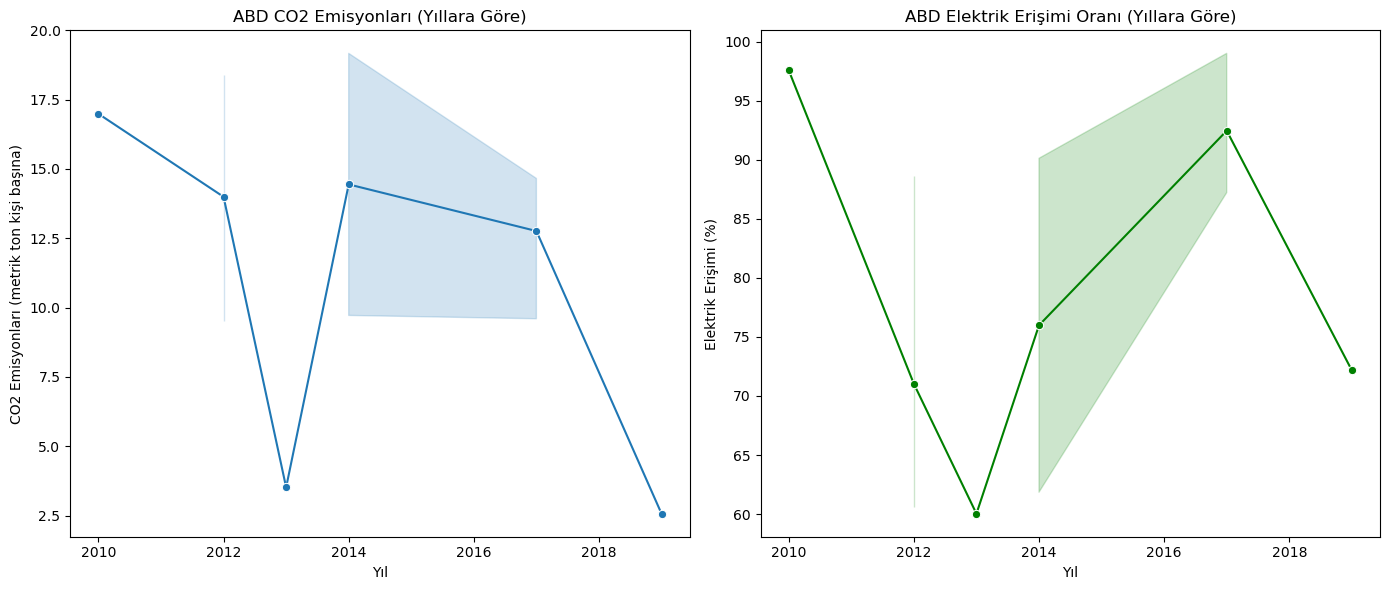

In [31]:
# Yıllara göre CO2 Emisyonları ve Elektrik Erişimi Oranı grafikleri
plt.figure(figsize=(14, 6))

# CO2 Emisyonları Zaman Serisi
plt.subplot(1, 2, 1)
sns.lineplot(data=usa_data, x='Year', y='CO2 Emissions (metric tons per capita)', marker="o")
plt.title("ABD CO2 Emisyonları (Yıllara Göre)")
plt.xlabel("Yıl")
plt.ylabel("CO2 Emisyonları (metrik ton kişi başına)")

# Elektrik Erişimi Oranı Zaman Serisi
plt.subplot(1, 2, 2)
sns.lineplot(data=usa_data, x='Year', y='Access to Electricity (%)', marker="o", color="g")
plt.title("ABD Elektrik Erişimi Oranı (Yıllara Göre)")
plt.xlabel("Yıl")
plt.ylabel("Elektrik Erişimi (%)")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Amerikan Nüfusu')

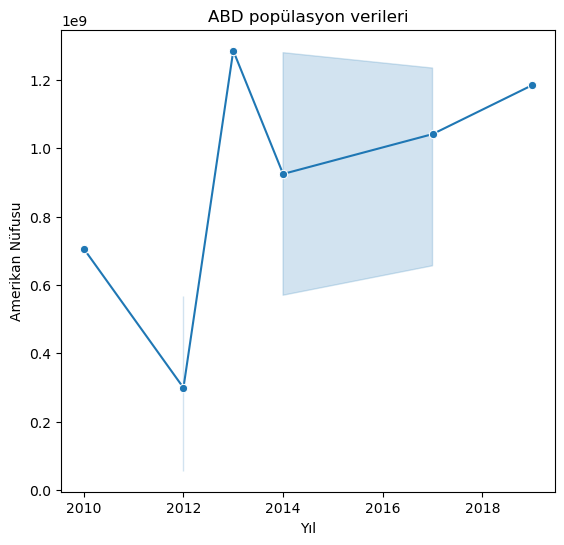

In [34]:
#ABD nüfus değşimi
plt.figure(figsize=(14, 6))
plt.subplot(1,2,2)
sns.lineplot(data=usa_data,x='Year',y='Population',marker="o")
plt.title("ABD popülasyon verileri")
plt.xlabel('Yıl')
plt.ylabel("Amerikan Nüfusu")